In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import tensorflow as tf

In [2]:
dataset_path = 'D:\data_speech_commands_v0.02'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [3]:
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [4]:
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

1664
2014
2064
2031
2128
3917
3787
4052
1579
1557
3728
3880
2054
2113
1575
3801
2100
3934
3941
3745
3845
3890
3778
3998
2022
3860
3872
3727
1759
3880
3723
1592
2123
4044
4052
7
Total samples: 105836


In [5]:
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 0.1 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [6]:
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

D:\data_speech_commands_v0.02\backward
D:\data_speech_commands_v0.02\bed
D:\data_speech_commands_v0.02\bird
D:\data_speech_commands_v0.02\cat
D:\data_speech_commands_v0.02\dog
D:\data_speech_commands_v0.02\down
D:\data_speech_commands_v0.02\eight
D:\data_speech_commands_v0.02\five
D:\data_speech_commands_v0.02\follow
D:\data_speech_commands_v0.02\forward
D:\data_speech_commands_v0.02\four
D:\data_speech_commands_v0.02\go
D:\data_speech_commands_v0.02\happy
D:\data_speech_commands_v0.02\house
D:\data_speech_commands_v0.02\learn
D:\data_speech_commands_v0.02\left
D:\data_speech_commands_v0.02\marvin
D:\data_speech_commands_v0.02\nine
D:\data_speech_commands_v0.02\no
D:\data_speech_commands_v0.02\off
D:\data_speech_commands_v0.02\on
D:\data_speech_commands_v0.02\one
D:\data_speech_commands_v0.02\right
D:\data_speech_commands_v0.02\seven
D:\data_speech_commands_v0.02\sheila
D:\data_speech_commands_v0.02\six
D:\data_speech_commands_v0.02\stop
D:\data_speech_commands_v0.02\three
D:\data_spee

In [7]:
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [8]:
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [9]:
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [10]:
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105836
10583


In [11]:
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [12]:
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [13]:
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [14]:
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [15]:
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1

Dropped: 7 (16, 15)
Dropped: 12 (16, 13)
Dropped: 22 (16, 13)
Dropped: 31 (16, 11)
Dropped: 38 (16, 15)
Dropped: 83 (16, 9)
Dropped: 126 (16, 15)
Dropped: 140 (16, 15)
Dropped: 147 (16, 7)
Dropped: 153 (16, 13)
Dropped: 167 (16, 15)
Dropped: 178 (16, 14)
Dropped: 183 (16, 13)
Dropped: 186 (16, 13)
Dropped: 220 (16, 13)
Dropped: 238 (16, 13)
Dropped: 242 (16, 12)
Dropped: 267 (16, 14)
Dropped: 280 (16, 14)
Dropped: 300 (16, 10)
Dropped: 303 (16, 12)
Dropped: 311 (16, 10)
Dropped: 344 (16, 13)
Dropped: 350 (16, 14)
Dropped: 353 (16, 10)
Dropped: 361 (16, 13)
Dropped: 399 (16, 12)
Dropped: 405 (16, 15)
Dropped: 409 (16, 13)
Dropped: 421 (16, 13)
Dropped: 423 (16, 15)
Dropped: 424 (16, 12)
Dropped: 441 (16, 13)
Dropped: 450 (16, 13)
Dropped: 454 (16, 15)
Dropped: 470 (16, 11)
Dropped: 471 (16, 12)
Dropped: 476 (16, 15)
Dropped: 483 (16, 9)
Dropped: 484 (16, 13)
Dropped: 496 (16, 14)


In [16]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.082


MFCCs: [[-9.90671633e+01 -9.94904370e+01 -6.49707213e+01 -4.83434088e+01
  -4.21266357e+01 -3.93318260e+01 -2.73306000e+01 -2.15501990e+01
  -1.83544889e+01 -1.76974113e+01 -2.05168983e+01 -2.65155887e+01
  -3.23111625e+01 -3.80961155e+01 -4.57868417e+01 -5.79396309e+01]
 [ 2.76493412e-01  5.78018175e-01 -1.36887535e+00 -3.91215732e+00
  -7.46640929e+00 -1.06462991e+01 -1.87370323e+00  4.06819828e+00
   6.21373899e+00  5.73608434e+00  4.94769311e+00  5.39314691e+00
   6.16025432e+00  5.82971765e+00  4.96563119e+00  4.18287085e+00]
 [ 5.43262422e-01  6.56360787e-01  1.99568045e+00  3.65302818e+00
   5.34521503e+00  4.04819335e+00  5.29119903e+00  3.92233705e+00
   2.63753105e+00  3.86339385e+00  7.36615003e+00  1.17731041e+01
   1.39140954e+01  1.38889495e+01  1.09251521e+01  5.40313587e+00]
 [-4.43523459e-01  7.95590842e-02 -7.11267741e+00 -7.89202476e+00
  -8.60355628e+00 -6.91513896e+00 -3.28211528e+00 -1.71068211e+00
   4.63981970e-01  6.26326966e-01 -1.36405817e-01 -1.26301263e+00


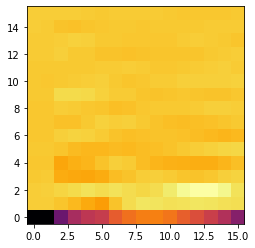

In [17]:
from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [18]:
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [19]:
with tf.device("/gpu:0"):    
    x_train, y_train, prob = extract_features(filenames_train, 
                                              y_orig_train)
    print('Removed percentage:', prob / len(y_orig_train))
    x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
    print('Removed percentage:', prob / len(y_orig_val))
    x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
    print('Removed percentage:', prob / len(y_orig_test))

Dropped: 7 (16, 15)
Dropped: 12 (16, 13)
Dropped: 22 (16, 13)
Dropped: 31 (16, 11)
Dropped: 38 (16, 15)
Dropped: 83 (16, 9)
Dropped: 126 (16, 15)
Dropped: 140 (16, 15)
Dropped: 147 (16, 7)
Dropped: 153 (16, 13)
Dropped: 167 (16, 15)
Dropped: 178 (16, 14)
Dropped: 183 (16, 13)
Dropped: 186 (16, 13)
Dropped: 220 (16, 13)
Dropped: 238 (16, 13)
Dropped: 242 (16, 12)
Dropped: 267 (16, 14)
Dropped: 280 (16, 14)
Dropped: 300 (16, 10)
Dropped: 303 (16, 12)
Dropped: 311 (16, 10)
Dropped: 344 (16, 13)
Dropped: 350 (16, 14)
Dropped: 353 (16, 10)
Dropped: 361 (16, 13)
Dropped: 399 (16, 12)
Dropped: 405 (16, 15)
Dropped: 409 (16, 13)
Dropped: 421 (16, 13)
Dropped: 423 (16, 15)
Dropped: 424 (16, 12)
Dropped: 441 (16, 13)
Dropped: 450 (16, 13)
Dropped: 454 (16, 15)
Dropped: 470 (16, 11)
Dropped: 471 (16, 12)
Dropped: 476 (16, 15)
Dropped: 483 (16, 9)
Dropped: 484 (16, 13)
Dropped: 496 (16, 14)
Dropped: 536 (16, 13)
Dropped: 549 (16, 11)
Dropped: 568 (16, 11)
Dropped: 573 (16, 13)
Dropped: 600 (16, 11

Dropped: 4446 (16, 12)
Dropped: 4458 (16, 13)
Dropped: 4470 (16, 6)
Dropped: 4483 (16, 13)
Dropped: 4484 (16, 15)
Dropped: 4490 (16, 14)
Dropped: 4496 (16, 13)
Dropped: 4500 (16, 10)
Dropped: 4516 (16, 11)
Dropped: 4517 (16, 10)
Dropped: 4523 (16, 14)
Dropped: 4544 (16, 15)
Dropped: 4545 (16, 10)
Dropped: 4557 (16, 11)
Dropped: 4559 (16, 11)
Dropped: 4563 (16, 7)
Dropped: 4574 (16, 15)
Dropped: 4584 (16, 7)
Dropped: 4621 (16, 11)
Dropped: 4632 (16, 14)
Dropped: 4656 (16, 9)
Dropped: 4659 (16, 11)
Dropped: 4667 (16, 13)
Dropped: 4689 (16, 11)
Dropped: 4697 (16, 9)
Dropped: 4701 (16, 8)
Dropped: 4713 (16, 14)
Dropped: 4736 (16, 11)
Dropped: 4749 (16, 10)
Dropped: 4752 (16, 13)
Dropped: 4761 (16, 9)
Dropped: 4762 (16, 9)
Dropped: 4770 (16, 13)
Dropped: 4800 (16, 13)
Dropped: 4825 (16, 12)
Dropped: 4844 (16, 15)
Dropped: 4848 (16, 7)
Dropped: 4860 (16, 14)
Dropped: 4861 (16, 13)
Dropped: 4865 (16, 15)
Dropped: 4885 (16, 11)
Dropped: 4905 (16, 13)
Dropped: 4912 (16, 13)
Dropped: 4914 (16, 9

Dropped: 8259 (16, 14)
Dropped: 8263 (16, 14)
Dropped: 8270 (16, 11)
Dropped: 8308 (16, 11)
Dropped: 8311 (16, 12)
Dropped: 8312 (16, 7)
Dropped: 8314 (16, 12)
Dropped: 8322 (16, 15)
Dropped: 8327 (16, 15)
Dropped: 8336 (16, 7)
Dropped: 8338 (16, 13)
Dropped: 8345 (16, 15)
Dropped: 8351 (16, 11)
Dropped: 8370 (16, 13)
Dropped: 8384 (16, 11)
Dropped: 8392 (16, 13)
Dropped: 8405 (16, 13)
Dropped: 8414 (16, 15)
Dropped: 8419 (16, 12)
Dropped: 8455 (16, 13)
Dropped: 8456 (16, 15)
Dropped: 8460 (16, 12)
Removed percentage: 0.007231006556112611
Dropped: 10 (16, 13)
Dropped: 11 (16, 13)
Dropped: 18 (16, 12)
Dropped: 44 (16, 13)
Dropped: 50 (16, 13)
Dropped: 61 (16, 12)
Dropped: 65 (16, 13)
Dropped: 75 (16, 8)
Dropped: 78 (16, 9)
Dropped: 92 (16, 14)
Dropped: 109 (16, 13)
Dropped: 123 (16, 14)
Dropped: 149 (16, 6)
Dropped: 163 (16, 12)
Dropped: 164 (16, 15)
Dropped: 165 (16, 7)
Dropped: 176 (16, 15)
Dropped: 215 (16, 9)
Dropped: 219 (16, 11)
Dropped: 222 (16, 11)
Dropped: 224 (16, 12)
Dropped:

In [20]:
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [21]:
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']